## LAB 1 : Sparse optimization of linear models

**Question (a)**

**The loss function L is defined as:**

\begin{align}
L = Σᵢ (XiW - yi)²
\end{align}

We know that the $W^{k+1}$ can be derived as:

\begin{align}
W^{k+1} &= W^k - \mu \frac {\delta l}{\delta W} (W^k)
\end{align}

where
\begin{align}
\frac {\delta l}{\delta W} (W^k) = 2 \sum_i (X_iW^k - y_i)X_i
\end{align}


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
X = np.array([[1, -2, -1, -1, 1],
              [2, -1, 2, 0, -2],
              [-1, 0, 2, 2, 1]])
y = np.array([7, 1, 1]).reshape(-1, 1)
learning_rate = 0.02
num_steps = 200


**Question (b)**

Weights are
 [[ 0.74759615]
 [-2.38942308]
 [ 0.12259615]
 [-0.03125   ]
 [ 1.56490385]]


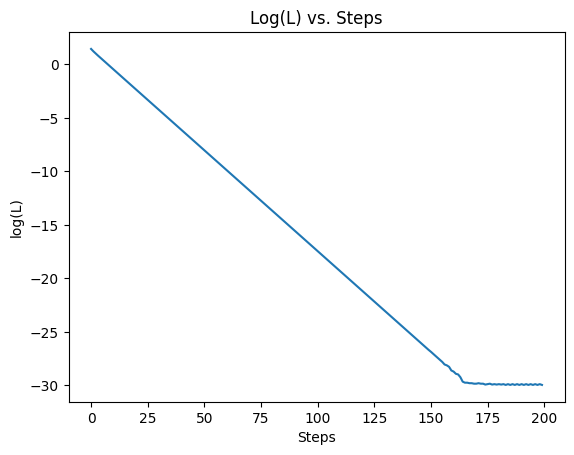

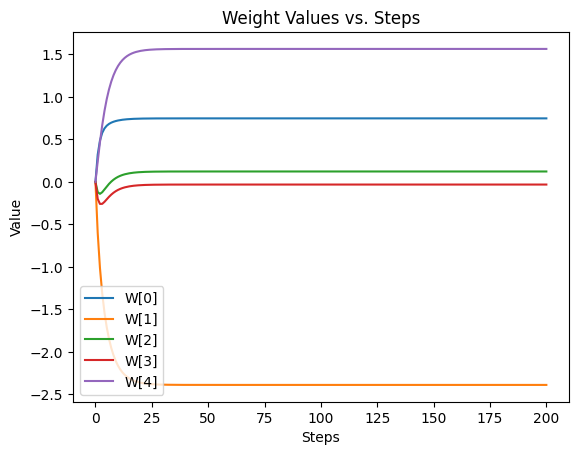

In [3]:
W_1 = np.zeros((5,1))
loss_1 = []
weight_1 = []

for step in range(num_steps):

  weight_1.append(W_1.copy())

  gradient= 2 * np.dot(X.T, (np.dot(X, W_1) - y))
  W_1 -= learning_rate * gradient


  loss = np.sum((X.dot(W_1) - y) ** 2)
  loss_1.append(np.log10(loss))

weight_1.append(W_1.copy())
loss_1 = np.array(loss_1)
weight_1 = np.array(weight_1)

print("Weights are\n",W_1)


plt.figure(1)
plt.plot(range(num_steps), loss_1)
plt.xlabel('Steps')
plt.ylabel('log(L)')
plt.title('Log(L) vs. Steps')


plt.figure(2)
for i in range(5):
    plt.plot(range(num_steps+1), weight_1[:, i], label=f'W[{i}]')

plt.xlabel('Steps')
plt.ylabel('Value')
plt.title('Weight Values vs. Steps')
plt.legend()

plt.show()


**Question (c)**

Weights are
 [[ 0.]
 [-3.]
 [ 0.]
 [ 0.]
 [ 1.]]


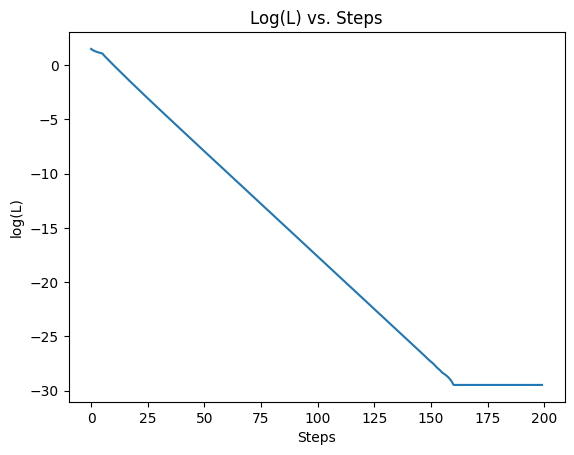

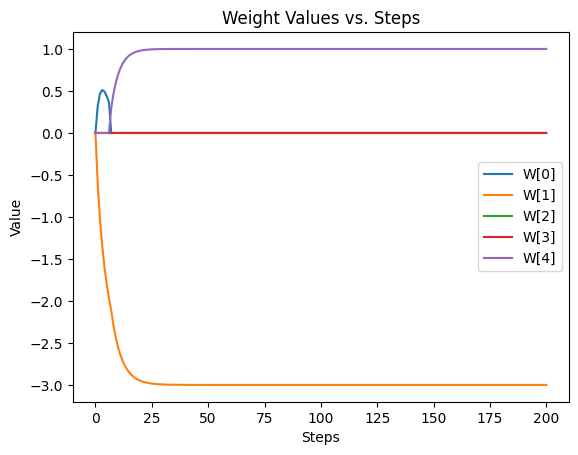

In [4]:
W_2 = np.zeros((5,1))
loss_2 = []
weight_2 = []
n=2

for step in range(num_steps):

  weight_2.append(W_2.copy())

  gradient= 2 * np.dot(X.T, (np.dot(X, W_2) - y))
  W_2 -= learning_rate * gradient
  if np.count_nonzero(W_2)>n:
      indices = np.argsort(np.absolute(W_2), axis=0)
      W_2[indices[:3]] = 0


  loss = np.sum((X.dot(W_2) - y) ** 2)
  loss_2.append(np.log10(loss))

weight_2.append(W_2.copy())
loss_2 = np.array(loss_2)
weight_2 = np.array(weight_2)

print("Weights are\n",W_2)

plt.figure(1)
plt.plot(range(num_steps), loss_2)
plt.xlabel('Steps')
plt.ylabel('log(L)')
plt.title('Log(L) vs. Steps')


plt.figure(2)
for i in range(5):
    plt.plot(range(num_steps+1), weight_2[:, i], label=f'W[{i}]')

plt.xlabel('Steps')
plt.ylabel('Value')
plt.title('Weight Values vs. Steps')
plt.legend()

plt.show()


**Question (d)**

Weights for lambda=0.2 is
 [[ 3.73490632e-01]
 [-2.67447522e+00]
 [ 3.12622639e-02]
 [ 3.51021267e-04]
 [ 1.25352897e+00]]
Weights for lambda=0.5 is
 [[ 9.86962942e-03]
 [-2.94696785e+00]
 [-7.87580251e-04]
 [ 8.60508674e-04]
 [ 9.57922261e-01]]
Weights for lambda=1.0 is
 [[-0.00767726]
 [-2.89320225]
 [ 0.00957581]
 [ 0.00316848]
 [ 0.91767585]]
Weights for lambda=2.0 is
 [[-0.00552779]
 [-2.77999112]
 [-0.04210149]
 [-0.00459144]
 [ 0.84427393]]


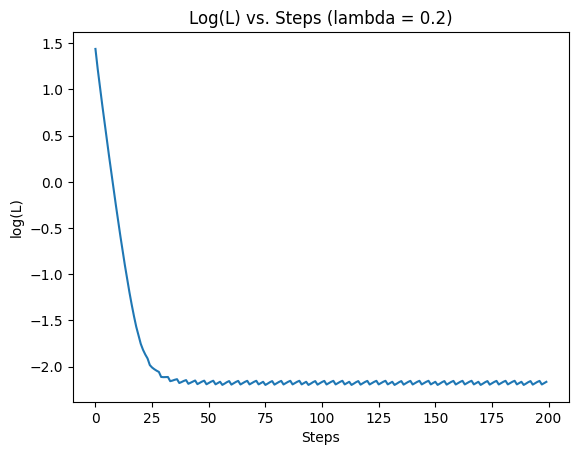

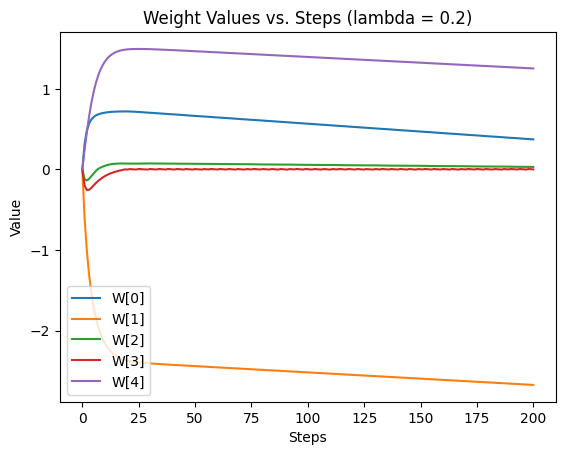

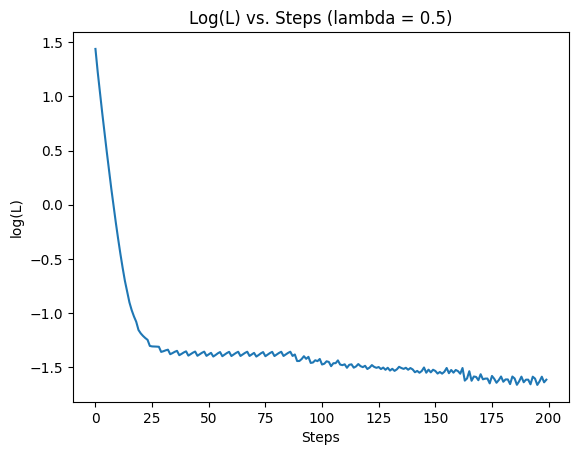

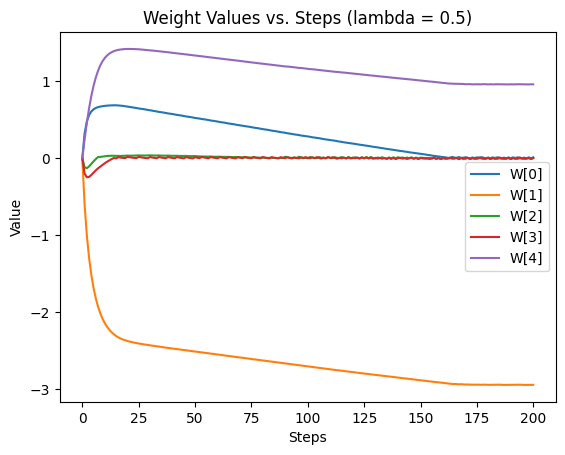

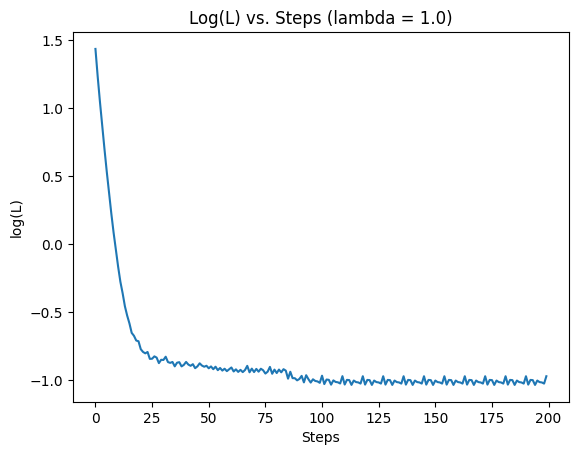

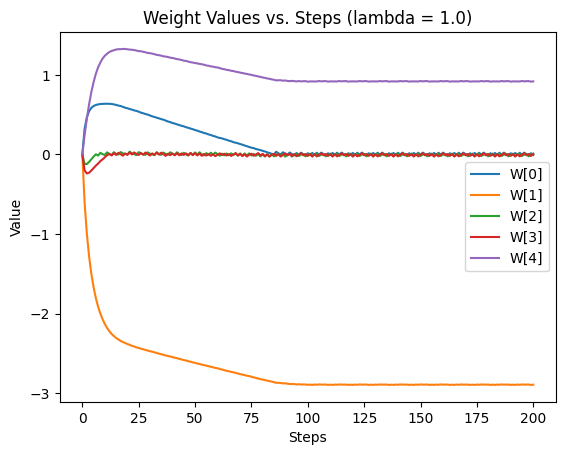

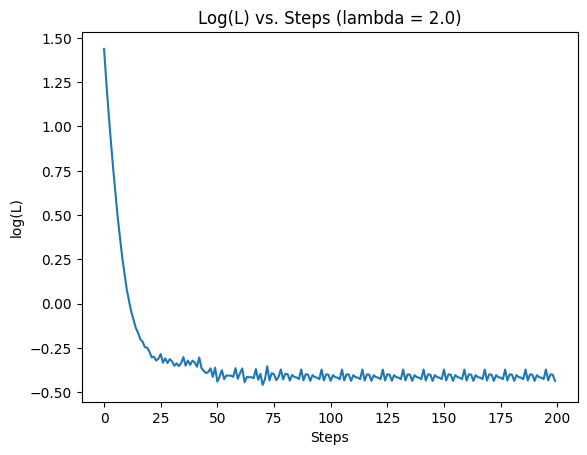

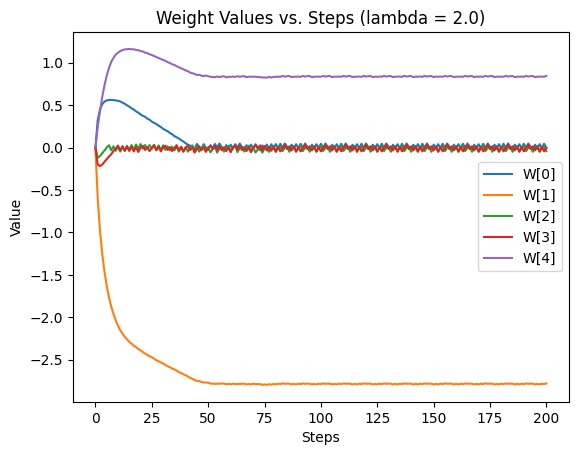

In [5]:
lambdas = [0.2, 0.5, 1.0, 2.0]

for lambda_value in lambdas:
    W_3 = np.zeros((5,1))

    loss_values = []
    weight_values = []
    weight_values.append(W_3.copy())

    for step in range(num_steps):
        gradient = 2 * X.T.dot(X.dot(W_3) - y) + lambda_value * np.sign(W_3)
        W_3 -= learning_rate * gradient
        loss = np.sum((X.dot(W_3) - y) ** 2)
        loss_values.append(np.log10(loss))
        weight_values.append(W_3.copy())

    loss_values = np.array(loss_values)
    weight_values = np.array(weight_values)
    print(f"Weights for lambda={lambda_value} is\n",W_3)



    plt.figure()
    plt.plot(range(num_steps), loss_values)
    plt.xlabel('Steps')
    plt.ylabel('log(L)')
    plt.title(f'Log(L) vs. Steps (lambda = {lambda_value})')

    plt.figure()
    for i in range(5):
        plt.plot(range(num_steps + 1), weight_values[:, i], label=f'W[{i}]')

    plt.xlabel('Steps')
    plt.ylabel('Value')
    plt.title(f'Weight Values vs. Steps (lambda = {lambda_value})')

    plt.legend()

plt.show()


Question (e)

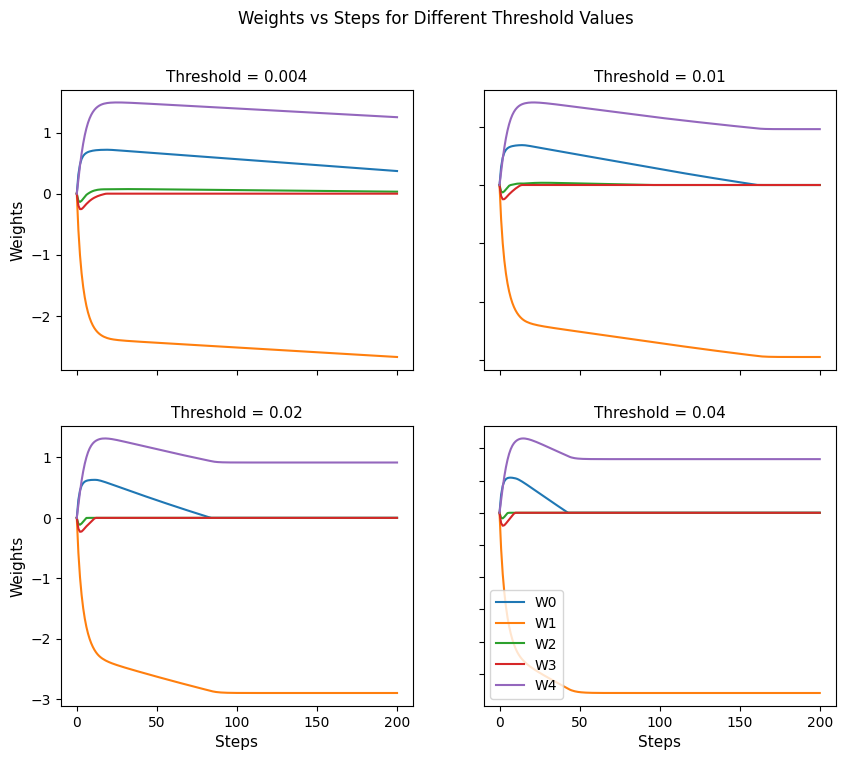

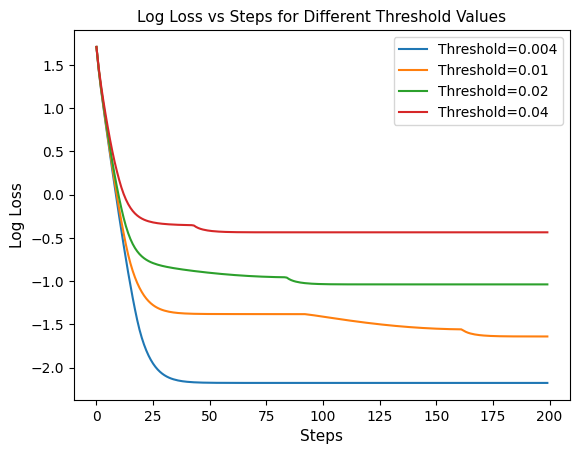

In [8]:
def proximal_lasso(threshold):
    weights_matrix = np.zeros((5, 1))
    regularization_strength = 2

    log_loss_history, weights_history = [], [weights_matrix.T[0]]

    for step in range(num_steps):
        loss = sum((X.dot(weights_matrix) - y) ** 2)
        gradient = 2 * np.dot(X.T, (X.dot(weights_matrix) - y))
        weights_matrix = weights_matrix - learning_rate * gradient
        weights_matrix = np.sign(weights_matrix) * np.maximum(abs(weights_matrix) - threshold, 0)

        log_loss_history.append(loss)
        weights_history.append(weights_matrix.T[0])

    weights_history = np.array(weights_history)

    return np.log10(log_loss_history), weights_history

threshold_values = [0.004, 0.01, 0.02, 0.04]
fig, axes = plt.subplots(2, 2, sharex=True, sharey=False, figsize=(10, 8))

losses_list = []
for j, threshold in enumerate(threshold_values):
    log_loss, weights_history = proximal_lasso(threshold)
    k, l = (round(max(j - 1, 0) / 2 + 0.1), j % 2)
    losses_list.append(log_loss.reshape(1, -1)[0])
    for i in range(5):
        axes[k, l].plot(np.arange(0, num_steps + 1), weights_history[:, i], label=f'W{i}')
    axes[k, l].set_xlabel('Steps', fontsize=11)
    axes[k, l].set_ylabel('Weights', fontsize=11)
    axes[k, l].set_title(f'Threshold = {threshold}', fontsize=11)
    axes[k, l].label_outer()

plt.suptitle('Weights vs Steps for Different Threshold Values', fontsize=12)
plt.legend()
plt.show()


losses_df = pd.DataFrame(np.array(losses_list).T, columns=[f'Threshold={threshold}' for threshold in threshold_values])
losses_df.plot()
plt.xlabel('Steps', fontsize=11)
plt.ylabel('Log Loss', fontsize=11)
plt.title('Log Loss vs Steps for Different Threshold Values', fontsize=11)
plt.show()


Question (f)

Lambda=1.0, Weights = [ 0. -3.  0. -0.  1.]
Lambda=2.0, Weights = [ 0. -3.  0. -0.  1.]
Lambda=5.0, Weights = [ 0. -3.  0. -0.  1.]
Lambda=10.0, Weights = [ 0. -3. -0. -0.  1.]


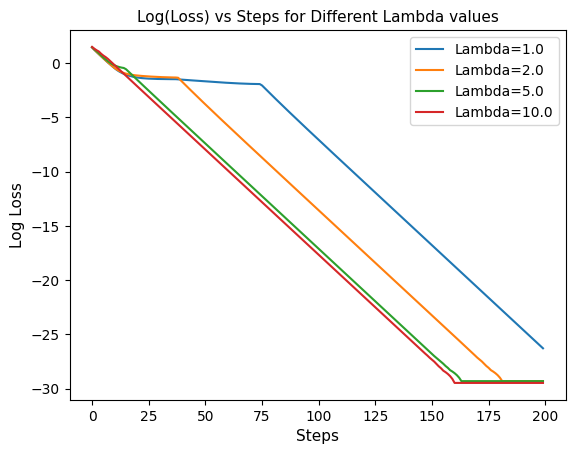

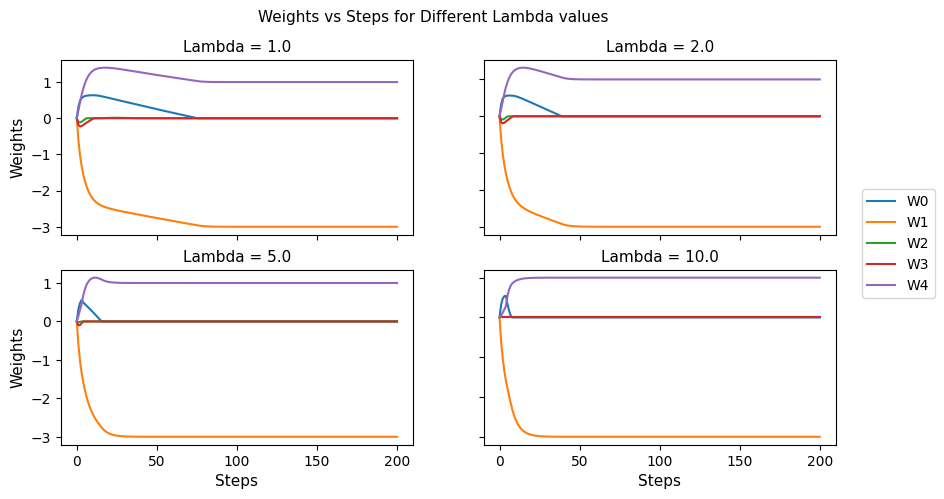

In [28]:
def update_weights(W, soft, mask):
    W_value = np.sign(W) * np.maximum(abs(W) - soft, 0)
    W[mask[:3]] = W_value[mask[:3]]
    return W

def trimmed_lasso_regularization(regularization_strength, threshold=2):
    weights = np.zeros((5, 1))
    weight_history = np.zeros((num_steps + 1, 5))
    log_loss_history = []

    for step in range(num_steps):
        gradient = 2 * np.dot(X.T, X.dot(weights) - y)
        weights -= learning_rate * gradient

        if np.count_nonzero(weights) > threshold:
            mask = np.argsort(np.abs(weights), axis=0).T[0]

        weights = update_weights(weights, regularization_strength * learning_rate, mask[:3])
        weight_history[step + 1] = weights.reshape(5)


        loss = sum((X.dot(weights) - y) ** 2)
        log_loss_history.append(loss)

    return np.log10(log_loss_history), weight_history

lambda_values = [1.0, 2.0, 5.0, 10.0]
losses_list = []
weights_list = []

for reg_strength in lambda_values:
    log_loss, weight_history = trimmed_lasso_regularization(reg_strength)
    losses_list.append(log_loss.reshape(1, -1))
    weights_list.append(weight_history)
    print(f"Lambda={reg_strength}, Weights = {weight_history[-1]}")


losses_df = pd.DataFrame(np.concatenate(losses_list, axis=0), index=[f'Lambda={reg_strength}' for reg_strength in lambda_values])
losses_df.T.plot()
plt.xlabel('Steps', fontsize=11)
plt.ylabel('Log Loss', fontsize=11)
plt.title('Log(Loss) vs Steps for Different Lambda values', fontsize=11)
plt.show()

fig, axes = plt.subplots(2, 2, sharex=True, sharey=False, figsize=(10, 5))
for j, reg_strength in enumerate(lambda_values):
    weight_history = weights_list[j]
    k, l = (round(max(j - 1, 0) / 2 + 0.1), j % 2)
    for i in range(5):
        axes[k, l].plot(np.arange(0, num_steps + 1), weight_history[:, i], label=f'W{i}')
    axes[k, l].set_xlabel('Steps', fontsize=11)
    axes[k, l].set_ylabel('Weights', fontsize=11)
    axes[k, l].set_title(f'Lambda = {reg_strength}', fontsize=11)
    axes[k, l].label_outer()

axes[1, 1].legend(loc='upper right', bbox_to_anchor=(1, 1, 0.3, 0.5))

plt.suptitle('Weights vs Steps for Different Lambda values ', fontsize=11)
plt.show()
